I will use two different datasets: fashion MNIST and a the famous Lena image. I will explore the use of clustering in two different ways: 
1. clustering as data exploration 
2. image compression

In [1]:
# Import Libraries
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import rand_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib.image import imread

## 1. Clustering as data exploration
For this application I will use clustering to group similar clothing items together. An application of image clustering is quicker recommendation retrievals. So this is a good application to practice clustering.

In [2]:
import pandas as pd
data = pd.read_csv('fashion-mnist_train.csv')
data.head()
data.isnull().sum().sum()
data.drop_duplicates(inplace=True)
data.shape
X = data.drop('label',axis=1)
y = data.label
#It is a large data set so use only 1500 observations to make your life easier.
X = X.loc[0:1500,]
y = y.loc[0:1500,]

I will use Hierarchical clustering, DBScan, and Gaussian Mixture Models on this dataset. K-Means will be used in the next exercise.

For each of the three clustering algorithms: Extract the cluster averages and plot the cluster averages as images. This is a 28 x 28 image. The steps taken are as follows:
1. Perform clustering.
2. For each cluster:
    - Compute the mean of observations (or directly extract the cluster center). Response is a 786 x 1 array (or dataframe).
    - Convert that to an array of 28 x 28. Call this variable 'array'.
    - Display the image.


### Agglomerative Clustering

First create a dendogram for the data set. How many clusters is suggested?

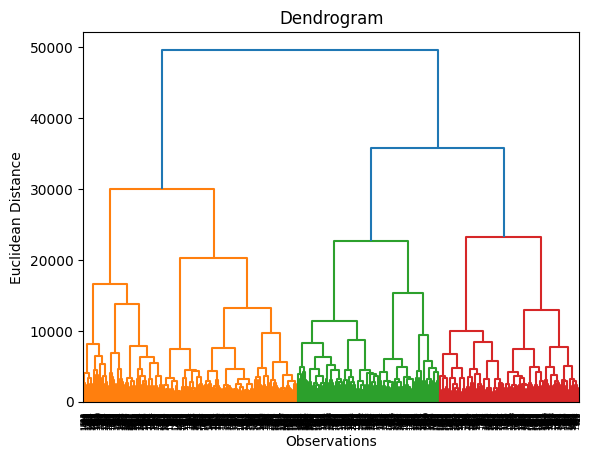

In [3]:
# Plot the dendrogram to see how many clusters we should use
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.show()

From the dendrogram, it looks like the dataset can be grouped into 4 clusters (2 on the left and 2 on the right).

Running Agglomerative Clustering with the suggested number of clusters, and perform the plotting procedures mentioned above.

In [4]:
# Run Agglomerative Clustering
n_c = 4
ac_4 = AgglomerativeClustering(n_clusters=n_c)
ac_4 = ac_4.fit(X)
agg_labels = ac_4.labels_


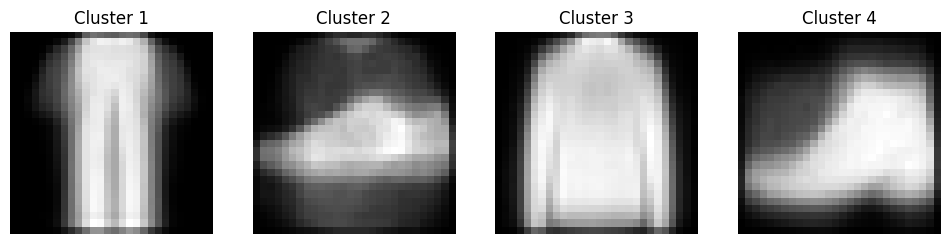

In [5]:
# Plot the cluster centers as images
plt.figure(figsize=(12, 6))
for i in range(n_c):
    plt.subplot(1, n_c, i + 1)
    mask = ac_4.labels_ == i
    array = np.reshape(np.array(X[mask].mean()), (28, 28))
    plt.imshow(array, cmap='gray')
    plt.title(f"Cluster {i + 1}")
    plt.axis('off')


Observations

* The algorithm effectively identifies shapes but struggles with objects of similar structure.
* For instance, in Cluster 1, it mistakenly groups a shirt with pants, despite their dissimilar apparel.
* Clusters 2 and 4 exhibit the algorithm's difficulty in distinguishing and categorizing unclear or indistinct objects (blob-like).

Now I repeat the above procedure, but with 10 clusters instead.

In [6]:
# Run Agglomerative Clustering
n_c = 10
ac_10 = AgglomerativeClustering(n_clusters=n_c)
ac_10 = ac_10.fit(X)
agg_labels = ac_10.labels_


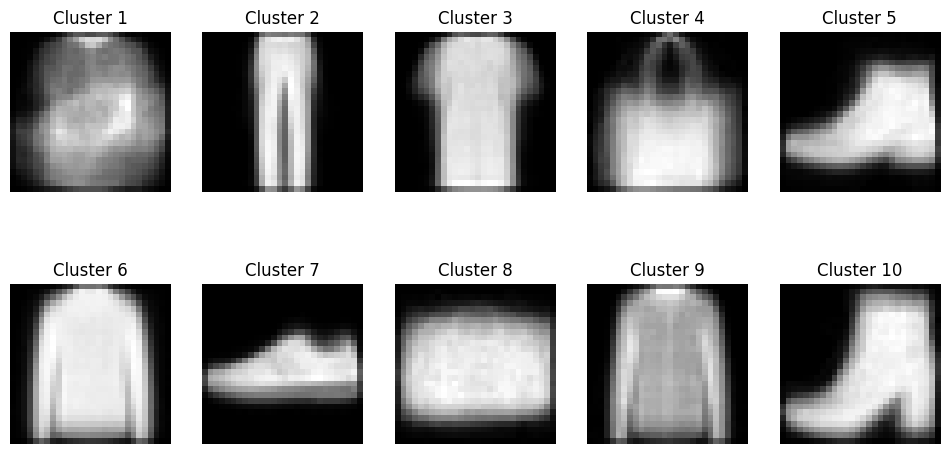

In [7]:
# Plot the cluster centers as images
plt.figure(figsize=(12, 6))
for i in range(n_c):
    plt.subplot(2, int(n_c/2), i + 1)
    mask = ac_10.labels_ == i
    array = np.reshape(np.array(X[mask].mean()), (28, 28))
    plt.imshow(array, cmap='gray')
    plt.title(f"Cluster {i + 1}")
    plt.axis('off')


Observations

* The current algorithm has significantly improved its ability to classify shapes, resulting in the creation of more distinct clusters.
* Nearly all the clusters represent shapes that can be readily associated with specific items, making their labels much clearer.
* However, there remains one cluster that appears to serve as a catch-all category for items that lack clear definitions. This cluster essentially functions as a repository for items that don't fit neatly into the other well-defined clusters.

While clustering is in general an unsupervised algorithm (i.e. labels are not required), note that we do have item labels for this dataset, so we can leverage that to evaluate the clustering performance. We can use the rand index to compare the labels given by the algorithm and the ground truth. 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html


In [8]:
# Compute Rand Scores for the two clustering results
print(f"""Rand Scores:
    4 clusters: {round(rand_score(y, ac_4.labels_), 4)}
    10 clusters: {round(rand_score(y, ac_10.labels_), 4)}""")

Rand Scores:
    4 clusters: 0.7693
    10 clusters: 0.8634


The Rand Scores show that increasing the number of clusters from 4 to 10 leads to improved clustering quality in terms of similarity to the true labels. Generally, a higher Rand Score is desirable as it indicates better clustering alignment with ground truth. However, the choice of the number of clusters should also consider practical implications and the goals of the analysis.

### Gaussian Mixture Model

In [9]:
# Perform GMM clustering 1
n_c = 4
gm_4 = GaussianMixture(n_components=n_c, n_init=10, random_state=42)
gm_4_labels = gm_4.fit_predict(X)

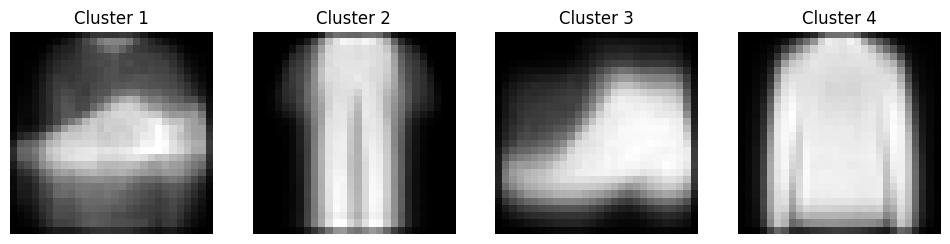

In [10]:
# Plot GMM clustering 1
plt.figure(figsize=(12, 6))
for idx, comp_mean in enumerate(gm_4.means_):
    plt.subplot(1, n_c, idx+1)
    array = np.reshape(comp_mean, (28, 28))
    plt.imshow(array, cmap="gray")
    plt.title(f"Cluster {idx + 1}")
    plt.axis('off')

In [11]:
# Perform GMM clustering 2
n_c = 10
gm_10 = GaussianMixture(n_components=n_c, n_init=10, random_state=42)
gm_10_labels = gm_10.fit_predict(X)

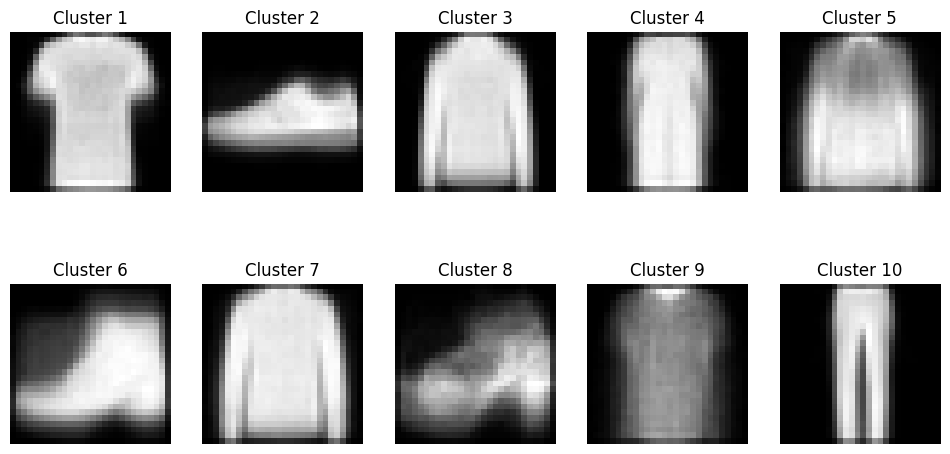

In [12]:
# Plot GMM clustering 2
plt.figure(figsize=(12, 6))
for idx, comp_mean in enumerate(gm_10.means_):
    plt.subplot(2, int(n_c/2), idx+1)
    array = np.reshape(comp_mean, (28, 28))
    plt.imshow(array, cmap="gray")
    plt.title(f"Cluster {idx + 1}")
    plt.axis('off')

In [13]:
# Compute Rand score for the both scenarios. 
print(f"""Rand Scores:
    4 clusters: {round(rand_score(y, gm_4_labels ), 4)}
    10 clusters: {round(rand_score(y, gm_10_labels), 4)}""")

Rand Scores:
    4 clusters: 0.7571
    10 clusters: 0.8818


Observations

* Much like Agglomerative clustering, when dealing with a small number of clusters, the resulting images tend to appear somewhat blurry and lack clear definition. Nevertheless, it is still possible to make a guess about the item category each cluster is attempting to represent.
* In contrast, as the number of clusters increases, the algorithm begins to unveil more sharply defined clusters, making it easier to identify distinct item categories within the dataset.
* In comparison to Agglomerative clustering, which had a single catch-all cluster, here there are a couple of clusters that are not that as well-defined as the others.
* The Rand scores support the notion that a greater number of clusters aligns more closely with reality than fewer clusters.

### DBScan

In [14]:
# Perform DBScan 1
dbscan_1000 = DBSCAN(eps=1000, min_samples=5)
dbscan_1000.fit(X)
np.unique(dbscan_1000.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

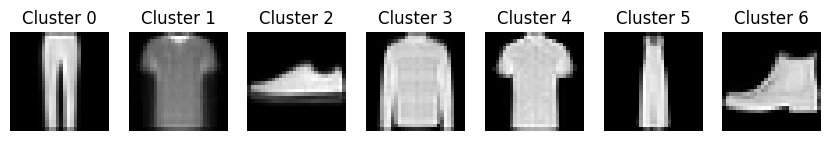

In [15]:
# Plot DBScan 1
unique_labels = np.unique(dbscan_1000.labels_)
cluster_averages = np.zeros((len(unique_labels), 28, 28))
for cluster_id in unique_labels:  # Iterate over the clusters
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_mask = (dbscan_1000.labels_ == cluster_id)
    cluster_data = X[cluster_mask]
    cluster_average = np.mean(cluster_data, axis=0)
    cluster_averages[cluster_id] = np.reshape(cluster_average, (28, 28))

# Plot the cluster averages as images
plt.figure(figsize=(12, 6))
for cluster_id in unique_labels:
    if cluster_id == -1:
        continue  # Skip noise points
    plt.subplot(1, len(unique_labels), cluster_id + 1)
    plt.imshow(cluster_averages[cluster_id], cmap='gray')
    plt.title(f'Cluster {cluster_id}')
    plt.axis('off')
plt.show()

In [16]:
# Perform DBScan 2
dbscan_750 = DBSCAN(eps=750, min_samples=3)
dbscan_750.fit(X)
np.unique(dbscan_750.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

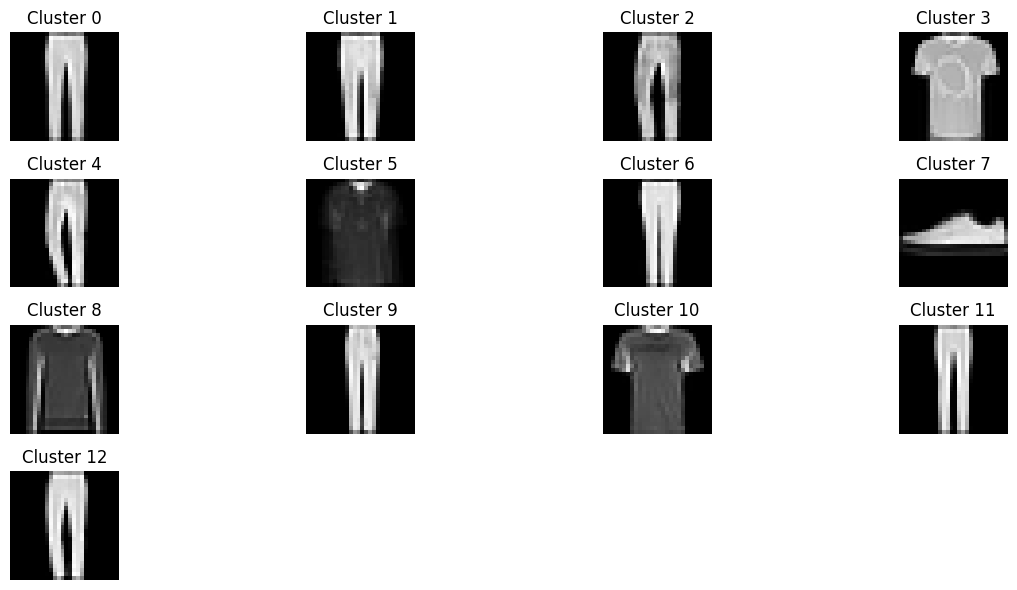

In [17]:
# Plot DBScan 2
unique_labels = np.unique(dbscan_750.labels_)
cluster_averages = np.zeros((len(unique_labels), 28, 28))
for cluster_id in unique_labels:  # Iterate over the clusters
    if cluster_id == -1:
        continue  # Skip noise points
    cluster_mask = (dbscan_750.labels_ == cluster_id)
    cluster_data = X[cluster_mask]
    cluster_average = np.mean(cluster_data, axis=0)
    cluster_averages[cluster_id] = np.reshape(cluster_average, (28, 28))

# Plot the cluster averages as images
plt.figure(figsize=(12, 6))
for cluster_id in unique_labels:
    if cluster_id == -1:
        continue  # Skip noise points
    plt.subplot(4, int(len(unique_labels)/3), cluster_id + 1)
    plt.imshow(cluster_averages[cluster_id], cmap='gray')
    plt.title(f'Cluster {cluster_id}')
    plt.axis('off')
    plt.tight_layout()
plt.show()

In [18]:
# Compute Rand score for the both scenarios.
print(f"""Rand Scores:
    4 clusters: {round(rand_score(y, dbscan_1000.labels_), 4)}
    10 clusters: {round(rand_score(y, dbscan_750.labels_), 4)}""")

Rand Scores:
    4 clusters: 0.3697
    10 clusters: 0.1819


Observations

* The clusters from using DBScan are much more defined than in the previous algorithms. 
* However, it seems that DBScan is forming clusters on a one-to-one basis with identified items, rather than grouping them into separate categories.
* While, at first glance, it may appear to be performing better, it's actually excessively differentiating items without categorizing them.
* The Rand scores indicate, precisely, that the labels generated for the both combination of hyperparameters don't match with the real labels.


## Image compression using K-Means
Another application of clustering is image compression, which is also known as color quantization. In simple words, the idea is to represent an image using a fewer number of colors (hence achieving a compression). Part of this exercise is taken from [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

An image is essentially a bunch of pixels grouped together. A pixel ranges from 0 - 255, where 0 presents dark and 255 white. For colored images, it can be presented as a 3D array of dimension m x n x 3, where the 3 dimensions represent RGB colors. 

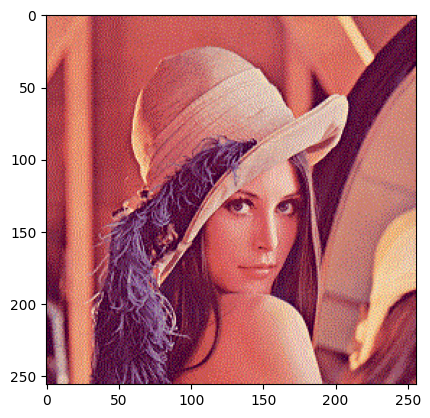

In [19]:
# Let's load the image
img = imread('lena_color.gif')
plt.imshow(img)
plt.show()


In [20]:
# This is the image size
img_size = img.shape
img_size

(256, 256, 4)

The image has dimension 256 x 256 x 4. Think of it as a matrix with 4 layers, where each layer is of dimension 256 x 256. If you explore the image, you will see it consists of many random values:

In [21]:
print(img)

[[[204 128 102 255]
  [255 128 153 255]
  [204 128 102 255]
  ...
  [204 128 153 255]
  [255 170 102 255]
  [204  85 102 255]]

 [[204 128 102 255]
  [255 128 153 255]
  [204 128 102 255]
  ...
  [255 170 102 255]
  [204 128 153 255]
  [204 128 102 255]]

 [[255 128 153 255]
  [204 128 102 255]
  [204 128 102 255]
  ...
  [255 128 153 255]
  [204 128 102 255]
  [204  85  51 255]]

 ...

 [[102   0  51 255]
  [ 51  43  51 255]
  [102   0  51 255]
  ...
  [153  85 102 255]
  [153  43  51 255]
  [153  85  51 255]]

 [[ 51  43  51 255]
  [102   0  51 255]
  [102   0  51 255]
  ...
  [153  43  51 255]
  [204  85 102 255]
  [153  43  51 255]]

 [[102   0  51 255]
  [102  43 102 255]
  [102  43  51 255]
  ...
  [153  43 102 255]
  [153  85  51 255]
  [204  85 102 255]]]


Each row is a pixel on the image. The goal here is to group similar pixels by replace it with the cluster mean. We will use KMeans to achieve this.

In [22]:
# First reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)

(65536, 4)


Running K-Means on this reshaped data set with 10 clusters.

In [23]:
# Run the Kmeans algorithm
compressed = KMeans(n_clusters=10, random_state=42, n_init='auto')
y_pred = compressed.fit_predict(X)


Now let's plot the original image and the compressed image, and compare the difference.

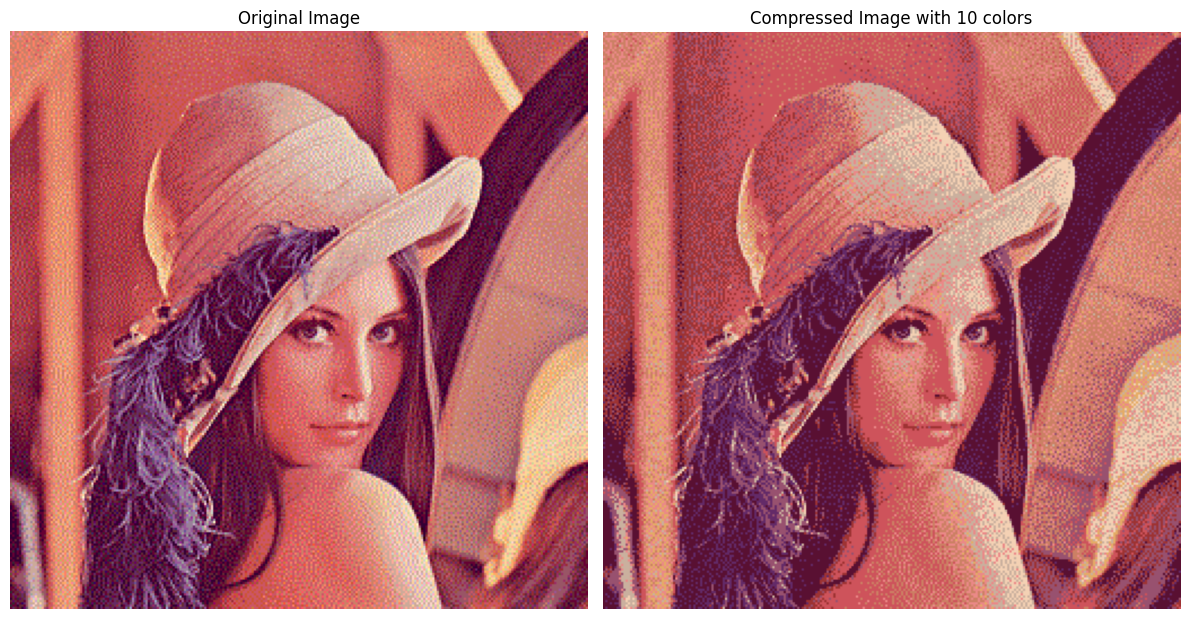

In [24]:
# Use the centroids to compress the image
X_compressed = compressed.cluster_centers_[compressed.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 256 * 256 * 4
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 10 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

**Observations**: 
* In the process of image compression with 10 colors, it has the effect of opaquing the image, resulting in a loss of color fidelity. This means that the original image's vibrant colors may appear muted or less vivid in the compressed version. 
* Additionally, K-Means clustering tends to smooth out noisy parts of the image with high contrast colors. However, it can make noisy parts with similar colors more noticeable, as the algorithm may group them together, accentuating the noise in those regions.

Now I'll use inertia to determine the best K value.

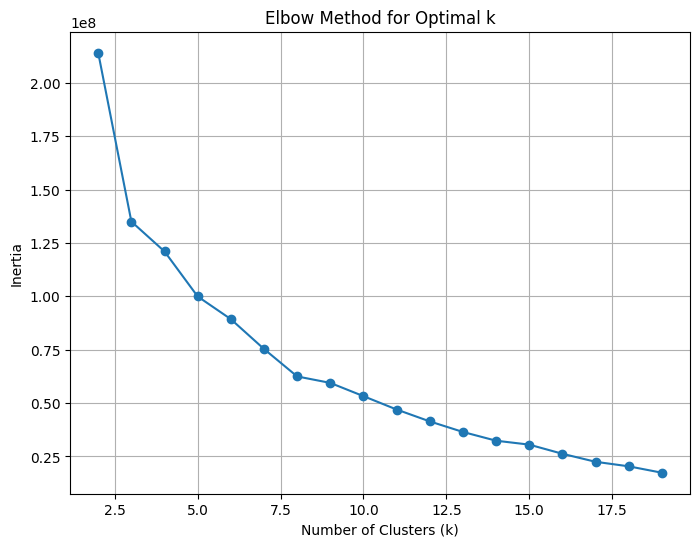

In [25]:
# Find the best K
inertias = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X).inertia_
                for k in range(2, 20)]

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [26]:
# Based on both inertia and Silhouette score, looks like 15 clusters is the best
compressed = KMeans(n_clusters=15, random_state=42, n_init='auto')
y_pred = compressed.fit_predict(X)


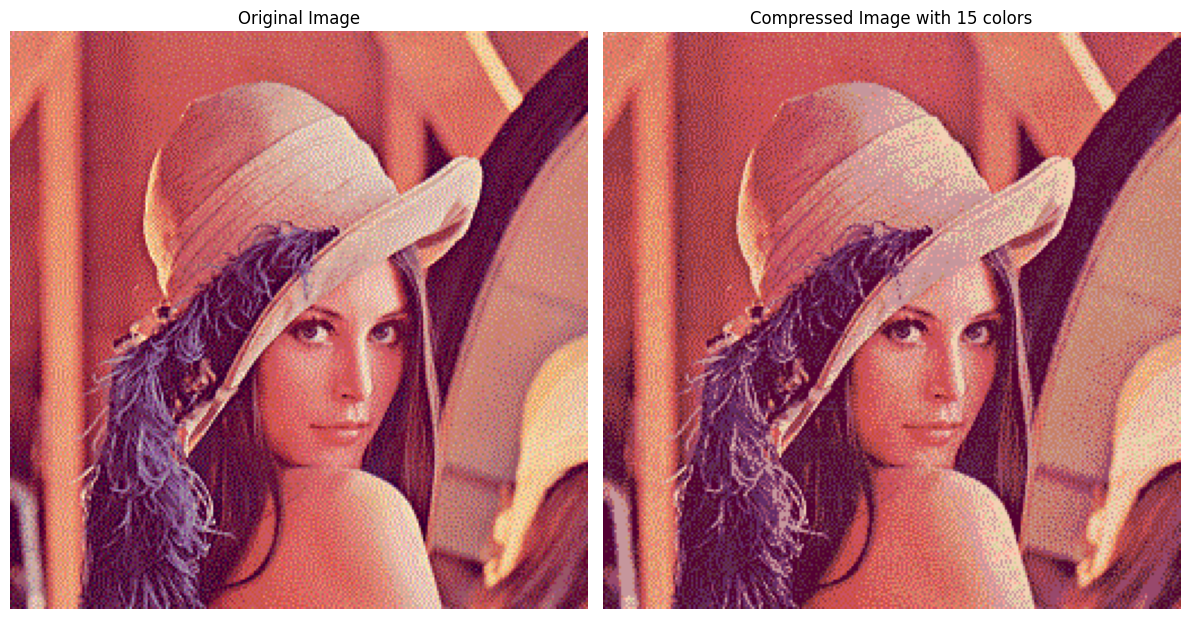

In [27]:
# Plot the old and new image
# Use the centroids to compress the image
X_compressed = compressed.cluster_centers_[compressed.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 256 * 256 * 4
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 15 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

**Observation**: 
* When increasing the compression to 15 colors, there is an improvement in color fidelity compared to the 10 colors compression image.
* It also introduces additional sharpness to the image. This increase in color depth can give the impression of heightened contrast, making the image appear crisper and more defined.